# **Business Problem**
**Data Driven Approach to classify glasses.**

# **Data Science Problem**
**Classification engine that predicts and classifies glass into different categories on the basis of their composition, refractive index and other attributes.**

##***Import Libraries and Dependencies***

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

### **Classification Models:**
    1. Logistic Regression
    2. Logistic Regression with Cross Validator
    3. Stochastic Gradient Descent Classifier
    4. Gaussian Naive Bayes
    5. K Nearest Neighbors
    6. Decision Tree Classifier
    7. Random Forest Classifier

In [3]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.externals import joblib

##***Uploading Data Source***

In [5]:
from google.colab import files
import io

uploaded = files.upload()

Saving glass.csv to glass.csv


In [6]:
data = pd.read_csv(io.BytesIO(uploaded['glass.csv']))

##***Inspecting and Analyzing Data Source***

In [7]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


###**Attribute Information:**

* Id number: 1 to 214 (removed from CSV file)
* RI: refractive index
* Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
* Mg: Magnesium
* Al: Aluminum
* Si: Silicon
* K: Potassium
* Ca: Calcium
* Ba: Barium
* Fe: Iron
* Type of glass: (class attribute)
    1. buildingwindowsfloatprocessed
    2. buildingwindowsnonfloatprocessed 
    3. vehiclewindowsfloatprocessed
    4. vehiclewindowsnonfloatprocessed (none in this database)
    5. containers
    6. tableware
    7. headlamps

In [8]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [10]:
num_col = data.select_dtypes(include = np.number).columns
categ_col = data.select_dtypes(exclude = np.number).columns

print("\n Numerical Columns: ", num_col)
print("\n Categorical Columns: ", categ_col)


 Numerical Columns:  Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

 Categorical Columns:  Index([], dtype='object')


In [11]:
# Checking for NA values

print(data.isna().sum())
print(data.shape)

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64
(214, 10)


##***Exploratory Data Analysis***

### *1. Check Distribution of Target Variable*

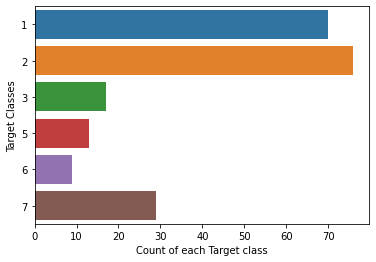

In [12]:
sns.countplot(y = data['Type'], data = data)
plt.xlabel('Count of each Target class')
plt.ylabel('Target Classes')
plt.show()

#### ***Data Viz Built in Tableau:***

[**Target Variable Distribution**](https://public.tableau.com/views/GlassTypePrediction/TargetVariableDistribution?:language=en&:retry=yes&:display_count=y&:origin=viz_share_link)

Here we can see, the Target Variable is not evenly distributed and there is **HIGH CLASS IMBALANCE** in Data.

So we'll be using mechanisms to eliminate this problem either by DownSampling or UpSampling, we'll see that later.

### *2. Check distribution of all features.*

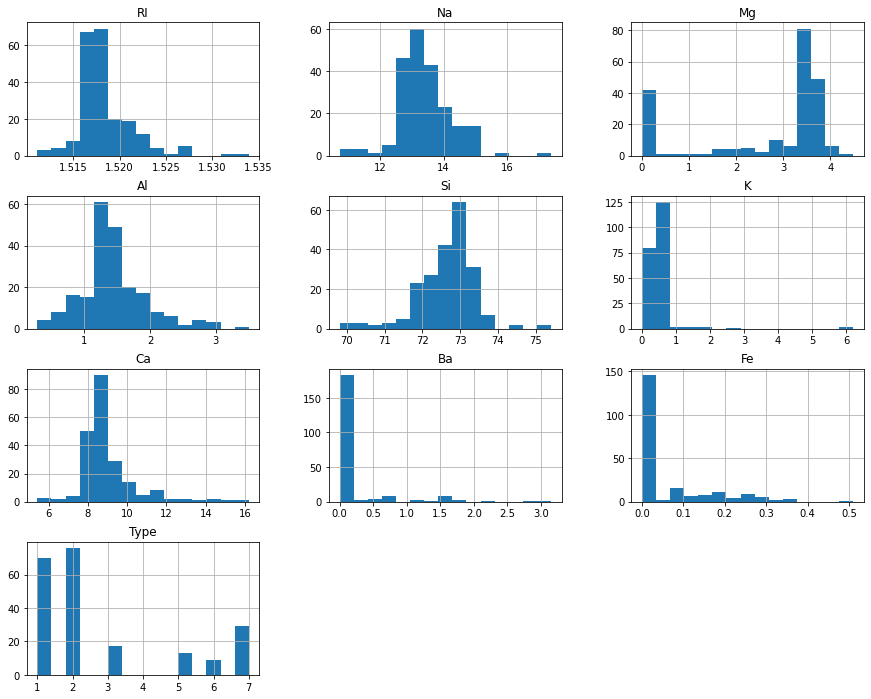

In [13]:

data.hist(figsize = (15, 12), bins = 15)
plt.title('Feature Distribution')
plt.show()

#### ***Data Viz Built in Tableau:***

[**All Features Distribution**](https://public.tableau.com/views/GlassTypePrediction/AllFeaturesDistribution?:language=en&:useGuest=true&:display_count=y&:origin=viz_share_link)

### *3.Checking for Multicollinearity of Features - Relational Dependencies among the features.*

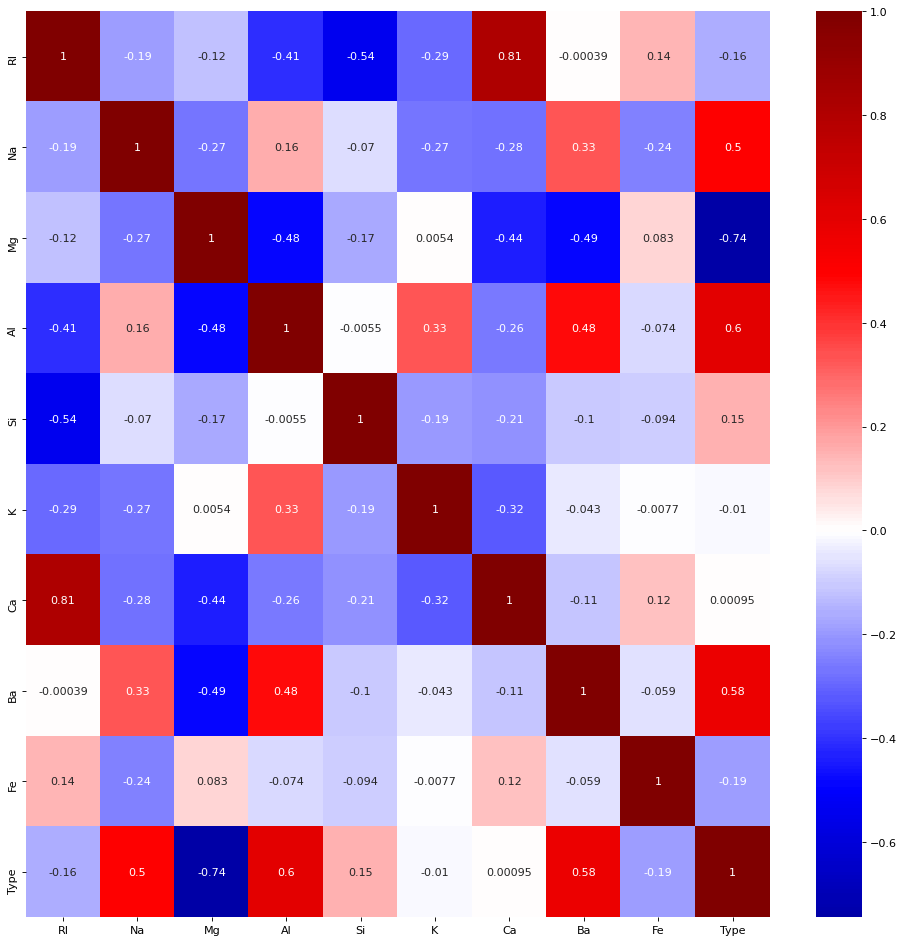

In [14]:
plt.figure(figsize = (15, 15), dpi = 80)
p = sns.heatmap(data[num_col].corr(), annot = True, cmap = 'seismic', center = 0)

### *4. Distribution of y variable corresponding to each feature - dependency of y on every x individually.*

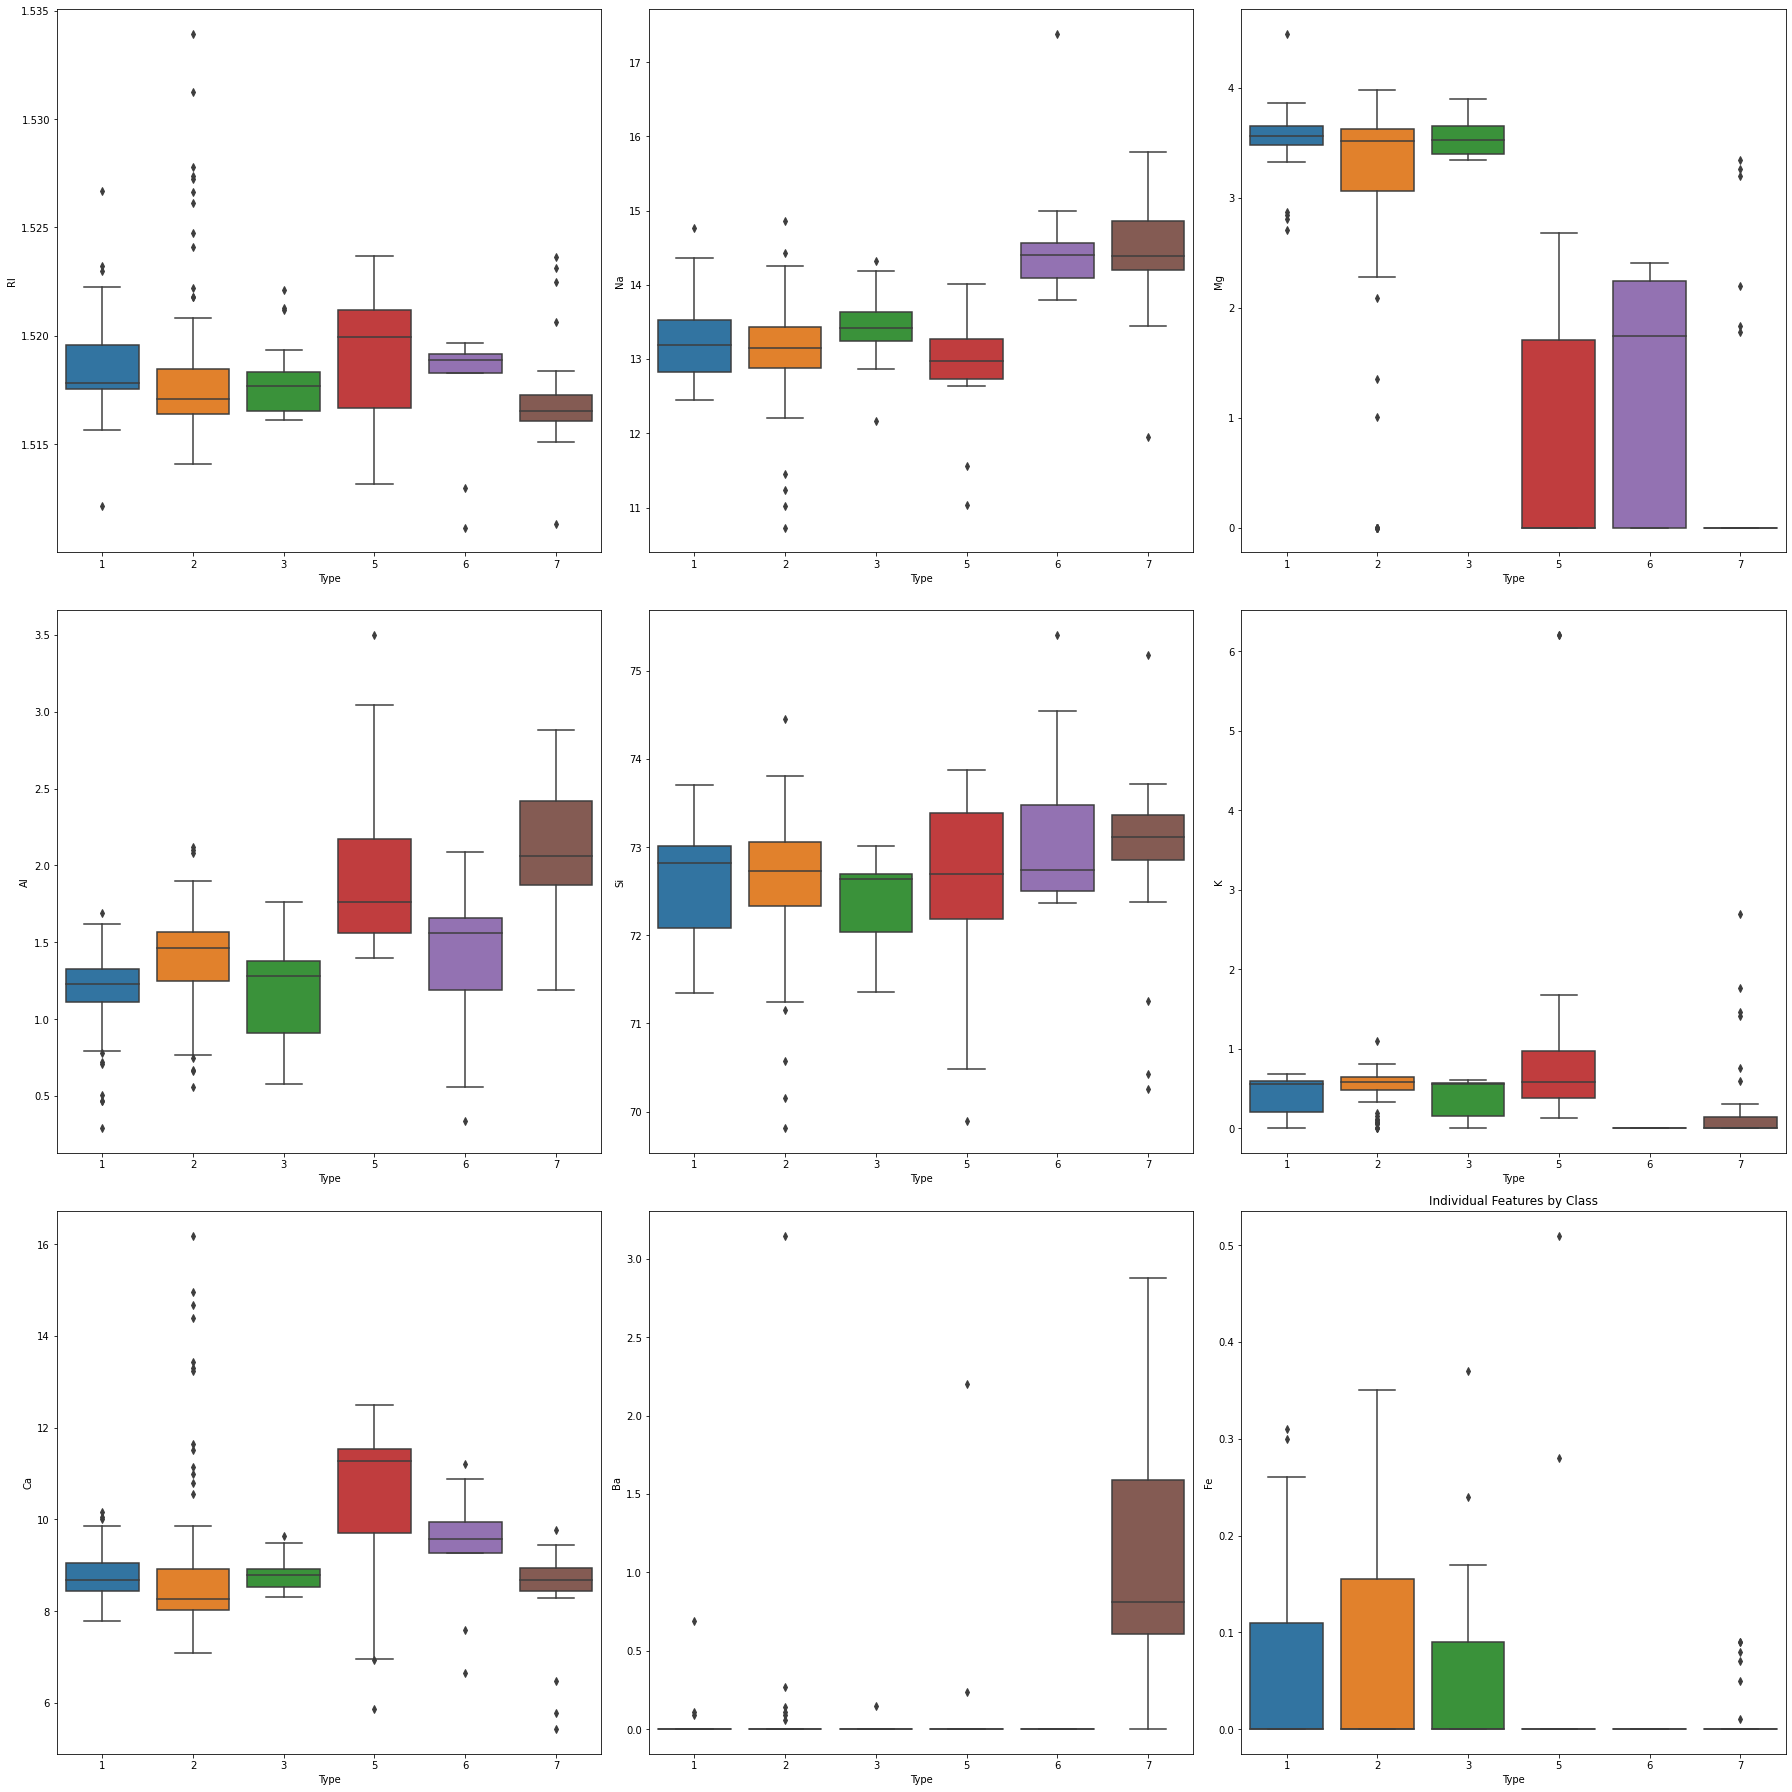

In [15]:
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (25,25))
plt.title('Individual Features by Class')
row = 0
col = 0
for i in range(len(data.columns)-1):
    if col > 2:
        row += 1
        col = 0
    axes = ax[row, col]
    sns.boxplot(x = data['Type'], y = data[data.columns[i]], ax = axes)
    col += 1

plt.tight_layout()
plt.show()

### ***Handling Class Imbalance - Over Sampling***

In [16]:
from imblearn.over_sampling import RandomOverSampler

X = data.drop(['Type'], axis = 1)
y = data['Type']

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)

In [17]:
(unique, counts) = np.unique(y, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print('Frequencies before Over Sampling: \n', frequencies)

Frequencies before Over Sampling: 
 [[ 1 70]
 [ 2 76]
 [ 3 17]
 [ 5 13]
 [ 6  9]
 [ 7 29]]


In [18]:
(unique, counts) = np.unique(y_ros, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print('Frequencies after Over Sampling: \n', frequencies)

Frequencies after Over Sampling: 
 [[ 1 76]
 [ 2 76]
 [ 3 76]
 [ 5 76]
 [ 6 76]
 [ 7 76]]


##***Model Building***

**Splitting Over-Sampled Dataset into Train-Test Data with test size of 35%**

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size = 0.35, random_state = 1050)

In [20]:
def evaluateModel(actual, prediction):
    print('\n\n\nConfusion Matrix:\n', confusion_matrix(actual, prediction))
    print('\n\nAccuracy Score:  {:.2f}%'.format(accuracy_score(actual, prediction)*100))
    print('\n\nClassification Report:\n', classification_report(actual, prediction))

In [21]:
def mean_absolute_percentage_error(actual, prediction):
    y_true, y_pred = np.array(actual), np.array(prediction)
    return np.mean(np.abs((actual - prediction)/ actual)) * 100

In [22]:
def modelMetrics(actual, prediction):
    print('R2 Score: ',r2_score(actual, prediction))
    print('MAE Score: ', mean_absolute_error(actual, prediction))
    print('MSE Score: ', mean_squared_error(actual, prediction))
    print('MAPE Score: ', mean_absolute_percentage_error(actual, prediction))



## **1. Logistic Regression**

In [23]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
print('Logistic Regression Model: \n', lr)
lrpred = lr.predict(X_test)

Logistic Regression Model: 
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [24]:
modelMetrics(y_test, lrpred)

R2 Score:  0.7416086130462318
MAE Score:  0.6
MSE Score:  1.275
MAPE Score:  42.1547619047619


In [25]:
evaluateModel(y_test, lrpred)




Confusion Matrix:
 [[ 5  8 22  0  0  0]
 [ 1 11  9  2  1  0]
 [ 5  0 17  0  0  0]
 [ 0  0  0 28  0  1]
 [ 0  0  0  0 24  0]
 [ 0  0  2  2  0 22]]


Accuracy Score:  66.88%


Classification Report:
               precision    recall  f1-score   support

           1       0.45      0.14      0.22        35
           2       0.58      0.46      0.51        24
           3       0.34      0.77      0.47        22
           5       0.88      0.97      0.92        29
           6       0.96      1.00      0.98        24
           7       0.96      0.85      0.90        26

    accuracy                           0.67       160
   macro avg       0.69      0.70      0.67       160
weighted avg       0.69      0.67      0.65       160



## **2. Logistic Regression with Cross Validation**

In [26]:
lrcv = LogisticRegressionCV()
lrcv.fit(X_train, y_train)
print('Logistic Regression CV Model: \n', lrcv)
lrcvpred = lrcv.predict(X_test)

Logistic Regression CV Model: 
 LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)


In [27]:
modelMetrics(y_test, lrcvpred)

R2 Score:  0.7352754908169727
MAE Score:  0.58125
MSE Score:  1.30625
MAPE Score:  37.63095238095238


In [28]:
evaluateModel(y_test, lrcvpred)




Confusion Matrix:
 [[ 9  8 18  0  0  0]
 [ 4 11  7  1  1  0]
 [ 7  0 15  0  0  0]
 [ 0  0  0 28  0  1]
 [ 0  0  0  0 24  0]
 [ 0  1  2  1  0 22]]


Accuracy Score:  68.12%


Classification Report:
               precision    recall  f1-score   support

           1       0.45      0.26      0.33        35
           2       0.55      0.46      0.50        24
           3       0.36      0.68      0.47        22
           5       0.93      0.97      0.95        29
           6       0.96      1.00      0.98        24
           7       0.96      0.85      0.90        26

    accuracy                           0.68       160
   macro avg       0.70      0.70      0.69       160
weighted avg       0.70      0.68      0.68       160



## **3. Stochastic Gradient Descent Classifier**

In [29]:
sgdc = SGDClassifier()
sgdc.fit(X_train, y_train)
print('SGDClassifier Model: \n', sgdc)
sgdpred = sgdc.predict(X_test)

SGDClassifier Model: 
 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


In [30]:
modelMetrics(y_test, sgdpred)

R2 Score:  0.5642811906269791
MAE Score:  0.8
MSE Score:  2.15
MAPE Score:  24.997023809523807


In [31]:
evaluateModel(y_test, sgdpred)




Confusion Matrix:
 [[35  0  0  0  0  0]
 [19  0  0  2  3  0]
 [22  0  0  0  0  0]
 [ 0  0  0 28  0  1]
 [ 0  0  0  0 24  0]
 [ 4  0  0  1 19  2]]


Accuracy Score:  55.62%


Classification Report:
               precision    recall  f1-score   support

           1       0.44      1.00      0.61        35
           2       0.00      0.00      0.00        24
           3       0.00      0.00      0.00        22
           5       0.90      0.97      0.93        29
           6       0.52      1.00      0.69        24
           7       0.67      0.08      0.14        26

    accuracy                           0.56       160
   macro avg       0.42      0.51      0.39       160
weighted avg       0.45      0.56      0.43       160



## **4. Gaussian Naive Bayes Classifier**

In [32]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Gaussian Naive Bayes Classifier Model: \n', sgdc)
gnbpred = gnb.predict(X_test)

Gaussian Naive Bayes Classifier Model: 
 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


In [33]:
modelMetrics(y_test, gnbpred)

R2 Score:  0.6453451551614946
MAE Score:  0.675
MSE Score:  1.75
MAPE Score:  41.41964285714286


In [34]:
evaluateModel(y_test, gnbpred)




Confusion Matrix:
 [[12  4 18  0  1  0]
 [ 5  4 12  2  1  0]
 [ 4  1 16  0  1  0]
 [ 0  2  0 27  0  0]
 [ 0  0  0  0 24  0]
 [ 2  0  0  3  0 21]]


Accuracy Score:  65.00%


Classification Report:
               precision    recall  f1-score   support

           1       0.52      0.34      0.41        35
           2       0.36      0.17      0.23        24
           3       0.35      0.73      0.47        22
           5       0.84      0.93      0.89        29
           6       0.89      1.00      0.94        24
           7       1.00      0.81      0.89        26

    accuracy                           0.65       160
   macro avg       0.66      0.66      0.64       160
weighted avg       0.67      0.65      0.64       160



## **5. K Nearest Neighbors Classifier**

In [38]:
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)
print('K Nearest Neighbors Classifier Model: \n', knc)
kncpred = knc.predict(X_test)

K Nearest Neighbors Classifier Model: 
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


In [36]:
modelMetrics(y_test, kncpred)

R2 Score:  0.7504749841671945
MAE Score:  0.44375
MSE Score:  1.23125
MAPE Score:  22.36904761904762


In [37]:
evaluateModel(y_test, kncpred)




Confusion Matrix:
 [[22  6  7  0  0  0]
 [ 4 14  3  1  2  0]
 [ 5  0 17  0  0  0]
 [ 0  1  0 28  0  0]
 [ 0  0  0  0 24  0]
 [ 0  2  2  1  0 21]]


Accuracy Score:  78.75%


Classification Report:
               precision    recall  f1-score   support

           1       0.71      0.63      0.67        35
           2       0.61      0.58      0.60        24
           3       0.59      0.77      0.67        22
           5       0.93      0.97      0.95        29
           6       0.92      1.00      0.96        24
           7       1.00      0.81      0.89        26

    accuracy                           0.79       160
   macro avg       0.79      0.79      0.79       160
weighted avg       0.80      0.79      0.79       160



## **6. Decision Tree Classifier**

In [39]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
print('Decision Tree Classifier Model: \n', dtc)
dtcpred = dtc.predict(X_test)

Decision Tree Classifier Model: 
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [40]:
modelMetrics(y_test, dtcpred)

R2 Score:  0.8682710576314123
MAE Score:  0.225
MSE Score:  0.65
MAPE Score:  12.5


In [42]:
evaluateModel(y_test, dtcpred)




Confusion Matrix:
 [[24  8  3  0  0  0]
 [ 6 16  2  0  0  0]
 [ 0  0 22  0  0  0]
 [ 0  0  0 29  0  0]
 [ 0  0  0  0 24  0]
 [ 2  0  0  1  0 23]]


Accuracy Score:  86.25%


Classification Report:
               precision    recall  f1-score   support

           1       0.75      0.69      0.72        35
           2       0.67      0.67      0.67        24
           3       0.81      1.00      0.90        22
           5       0.97      1.00      0.98        29
           6       1.00      1.00      1.00        24
           7       1.00      0.88      0.94        26

    accuracy                           0.86       160
   macro avg       0.87      0.87      0.87       160
weighted avg       0.86      0.86      0.86       160



## **7. Random Forest Classifier**

In [138]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
print('Random Forest Classifier Model: \n', rfc)
rfcpred = rfc.predict(X_test)

Random Forest Classifier Model: 
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [139]:
modelMetrics(y_test, rfcpred)

R2 Score:  0.844205193160228
MAE Score:  0.19375
MSE Score:  0.76875
MAPE Score:  7.321428571428572


In [140]:
evaluateModel(y_test, rfcpred)




Confusion Matrix:
 [[31  2  2  0  0  0]
 [ 1 20  2  1  0  0]
 [ 0  0 22  0  0  0]
 [ 0  0  0 29  0  0]
 [ 0  0  0  0 24  0]
 [ 2  1  0  1  0 22]]


Accuracy Score:  92.50%


Classification Report:
               precision    recall  f1-score   support

           1       0.91      0.89      0.90        35
           2       0.87      0.83      0.85        24
           3       0.85      1.00      0.92        22
           5       0.94      1.00      0.97        29
           6       1.00      1.00      1.00        24
           7       1.00      0.85      0.92        26

    accuracy                           0.93       160
   macro avg       0.93      0.93      0.92       160
weighted avg       0.93      0.93      0.92       160



###**Hyperparameter Tuning using Grid SearchCV**

In [188]:
param_grid = {'n_estimators' : [100, 150, 200, 250],
              'criterion' : ['gini', 'entropy']           
}

grid = GridSearchCV(estimator = rfc, param_grid = param_grid, n_jobs= 5,
                    refit=True, verbose = 5)

In [189]:
#Fitting the train data on grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    1.9s
[Parallel(n_jobs=5)]: Done  40 out of  40 | elapsed:   10.9s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  40 out of  40 | elapsed:   10.9s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [190]:
gridpred = grid.predict(X_test)

In [191]:
print('Random Forest Classifier with GridSearchCV Model: \n', grid)

Random Forest Classifier with GridSearchCV Model: 
 GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=Fal

In [192]:
modelMetrics(y_test, gridpred)

R2 Score:  0.8188727042431919
MAE Score:  0.23125
MSE Score:  0.89375
MAPE Score:  9.821428571428573


In [193]:
evaluateModel(y_test, gridpred)




Confusion Matrix:
 [[30  2  3  0  0  0]
 [ 2 19  1  1  1  0]
 [ 0  0 22  0  0  0]
 [ 0  0  0 29  0  0]
 [ 0  0  0  0 24  0]
 [ 2  1  0  1  0 22]]


Accuracy Score:  91.25%


Classification Report:
               precision    recall  f1-score   support

           1       0.88      0.86      0.87        35
           2       0.86      0.79      0.83        24
           3       0.85      1.00      0.92        22
           5       0.94      1.00      0.97        29
           6       0.96      1.00      0.98        24
           7       1.00      0.85      0.92        26

    accuracy                           0.91       160
   macro avg       0.91      0.92      0.91       160
weighted avg       0.91      0.91      0.91       160



In [194]:
print("Model Details: ", grid.best_estimator_)

Model Details:  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [195]:
print("Best Parameters: ", grid.best_params_)

Best Parameters:  {'criterion': 'entropy', 'n_estimators': 200}


In [196]:
grid.best_score_

0.9052542372881355

### **Generating Model**

In [198]:
joblib.dump(grid, 'GlassPredModel.pkl')

['GlassPredModel.pkl']